In [1]:
# imports
if 'google.colab' in str(get_ipython()):
    !git clone -b task-learning https://github.com/davidesartor/MANGO-lite
    !pip install gymnasium
    %cd MANGO-lite/
else:
    %cd ..
from tqdm.notebook import tqdm
import numpy as np
from mango.environments import frozen_lake
from frozen_lake_tests import utils_plot, utils_save, utils_sim

c:\Users\dsart\OneDrive\Desktop\Projects\MANGO\MANGO-lite


In [2]:
# parameters for the environment
map_scale = 2
p_frozen = 0.8

# parameters for the training
run_id = 0
N_episodes = 10000 
train_steps_per_episode = 5
episode_length = 4**map_scale

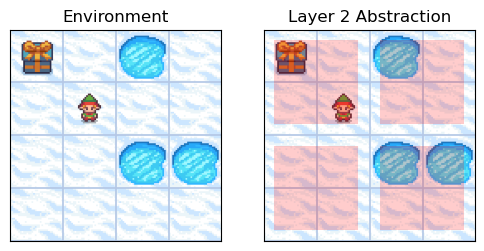

In [3]:
# create the environment and the option manager
dir_path = utils_save.path_to_save_dir(map_scale, p_frozen)
env = utils_sim.make_env(map_scale, p_frozen, seed=run_id)
mango_agent = utils_sim.make_mango_agent(env, map_scale)
frozen_lake.plot_utils.plot_all_abstractions(mango_agent)

In [4]:
# train loop
for iteration, randomness in enumerate(tqdm(np.linspace(1, 0, N_episodes))):
    randomness = 0.0 if iteration % 2 else randomness
    transitions = mango_agent.run_episode(randomness, episode_length)
    for _ in range(train_steps_per_episode):
        mango_agent.train(all_layers=True)

  0%|          | 0/10000 [00:00<?, ?it/s]

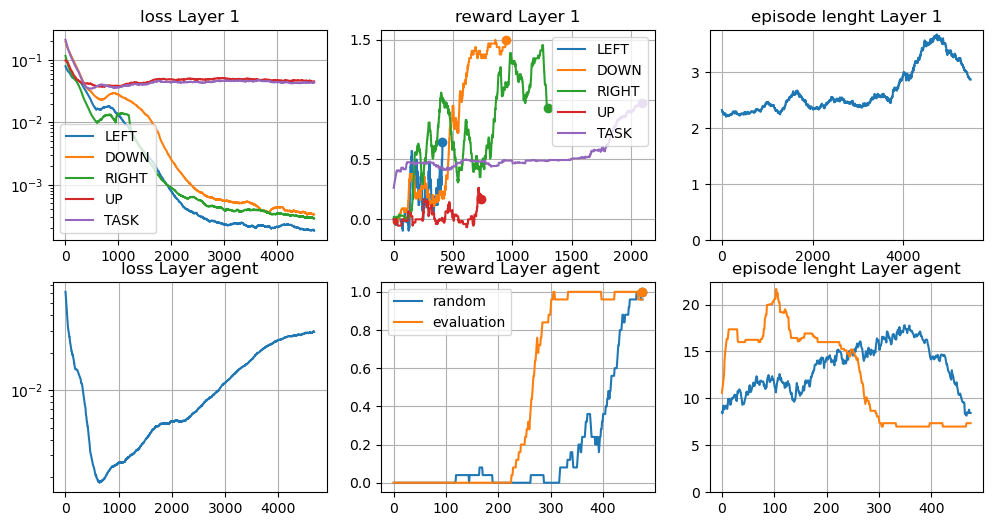

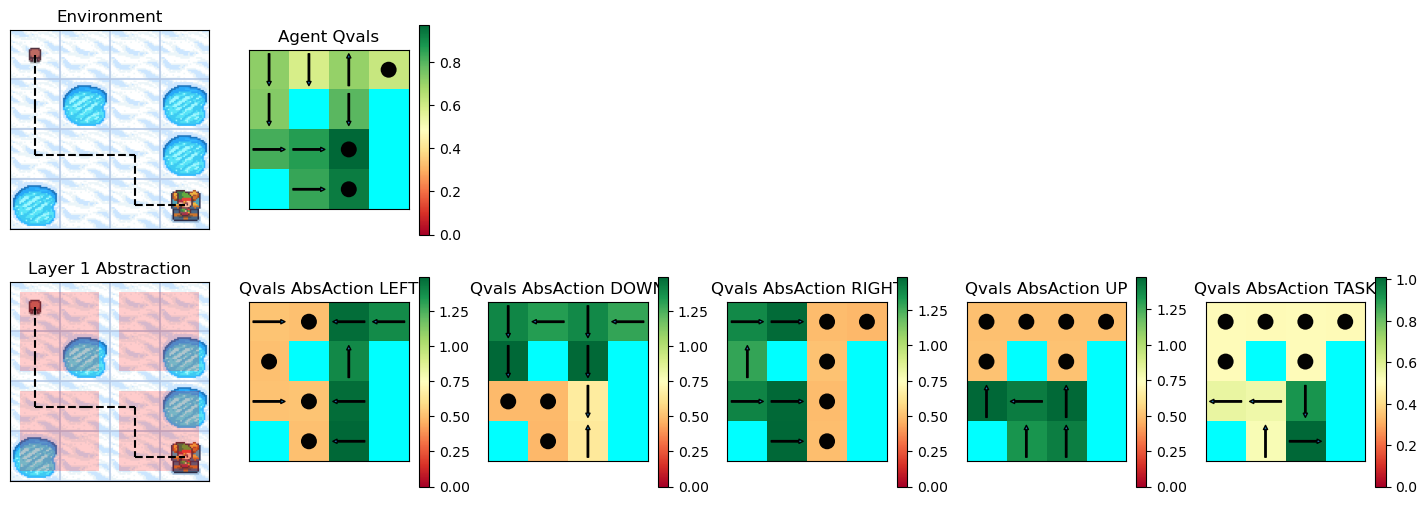

In [ ]:
# plot results and save
utils_save.save_to_file(path=dir_path + f"/model_mango_agent_run_{run_id}.pickle", obj=mango_agent)
utils_plot.plot_mango_loss_reward(mango_agent, save_path=dir_path + f"/mango_agent_training.png")
mango_agent.reset()
trajectory, rewards = mango_agent.run_episode(randomness=0.0, episode_length=episode_length)
frozen_lake.plot_utils.plot_all_qvals(mango_agent, trajectory, save_path=dir_path + f"/mango_agent_qvals.png")